In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/Iris.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.shape

(150, 6)

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

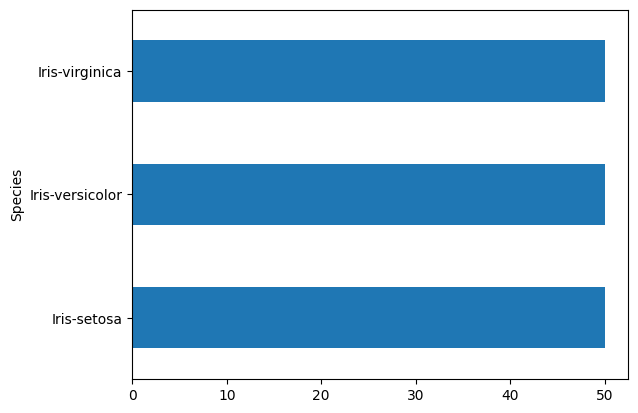

In [22]:
df["Species"].value_counts().plot.barh();

In [35]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

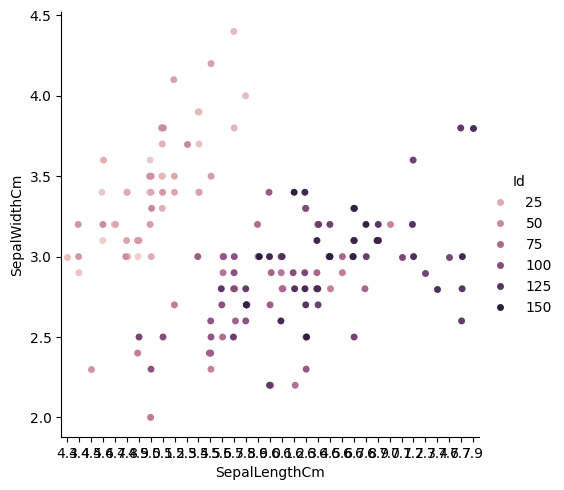

In [37]:
sns.catplot(x="SepalLengthCm", y= "SepalWidthCm", data = df, hue="Id");

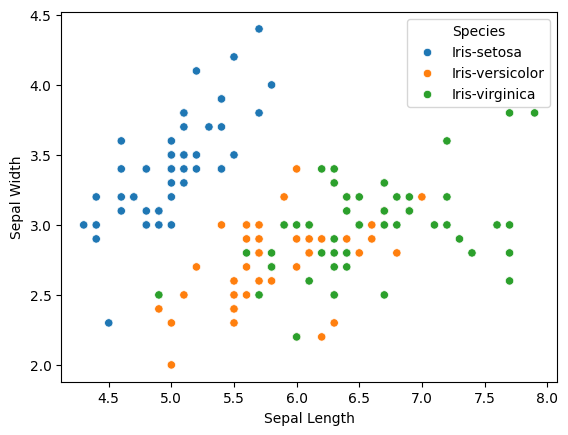

In [12]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


In [13]:
y=df["Species"] #bagımlı degisken
x=df.drop(["Species"],axis=1).astype('float64')

In [27]:
x_train,x_test,y_train,y_test =train_test_split(x,
                                                   y,
                                                   test_size=0.20,
                                                   random_state=23)

In [28]:
logistik= LogisticRegression()
logistik.fit(x_train, y_train)
l_y_pred = logistik.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_y_pred=knn.predict(x_test)

In [30]:
classification_report(y_test, l_y_pred)


'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        12\nIris-versicolor       1.00      1.00      1.00         8\n Iris-virginica       1.00      1.00      1.00        10\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

In [31]:
classification_report(y_test, knn_y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        12\nIris-versicolor       1.00      1.00      1.00         8\n Iris-virginica       1.00      1.00      1.00        10\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

Text(50.72222222222221, 0.5, 'Actual')

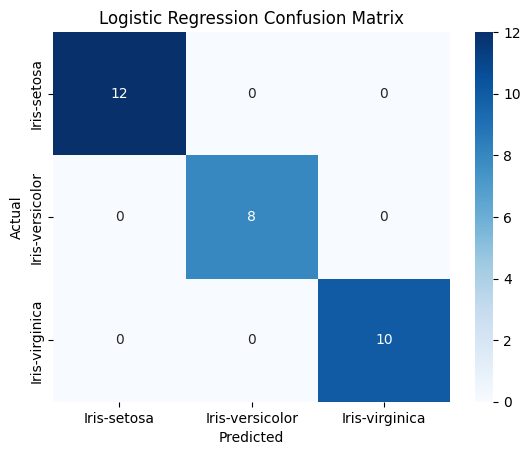

In [32]:
logistik_matrix = confusion_matrix(y_test, l_y_pred)
sns.heatmap(logistik_matrix,annot=True, cmap="Blues", fmt="d", xticklabels=set(y), yticklabels=set(y))
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


Text(0.5, 1.0, 'KNN Confusion Matrix')

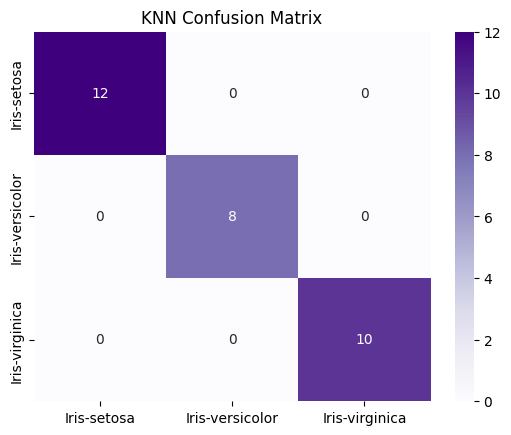

In [33]:
knn_matrix = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_matrix,annot=True,cmap="Purples",fmt="d",xticklabels=set(y),yticklabels=set(y))
plt.title("KNN Confusion Matrix")